In [1]:
from datgan import DATGAN
import datgan

import numpy as np
import pandas as pd
import networkx as nx

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv('../../data/LTDS/cleaned_select.csv')

In [3]:
df.head()

,gender,age,ethnicity,hh_borough,hh_people,hh_income,hh_carvan,hh_comp
0,female,44,White,Barnet,5,75-100k,4,Couple family
1,male,48,White,Barnet,5,75-100k,4,Couple family
2,female,22,White,Barnet,5,75-100k,4,Couple family
3,male,20,White,Barnet,5,75-100k,4,Couple family
4,male,14,White,Barnet,5,75-100k,4,Couple family


In [4]:
data_info = {
    'age': {
        'type': 'continuous',
        'bounds': [0, 100],
        'discrete': True
    }
}

# Add the other variables as categorical
for c in df.columns:
    if c not in data_info.keys():
        data_info[c] = {'type': 'categorical'}

In [5]:
graph = nx.DiGraph()

graph.add_edges_from([
    ('age', 'hh_comp'),
    ('gender', 'hh_comp'),
    ('ethnicity', 'hh_people'),
    ('hh_borough', 'hh_comp'),
    ('hh_borough', 'hh_carvan'),
    ('hh_borough', 'hh_income'),
    ('hh_comp', 'hh_income'),
    ('hh_comp', 'hh_people'),
    ('hh_income', 'hh_carvan'),
    ('hh_people', 'hh_carvan')
])

Preparing advice...
You might want to add the following edges in your DAG (direction not given here):
  - hh_carvan <-> hh_comp
  - age <-> hh_people


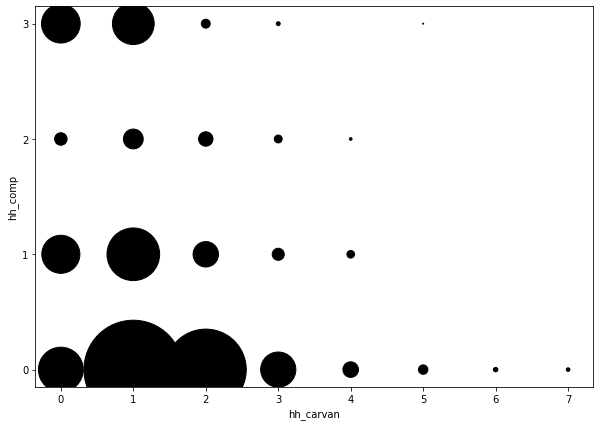

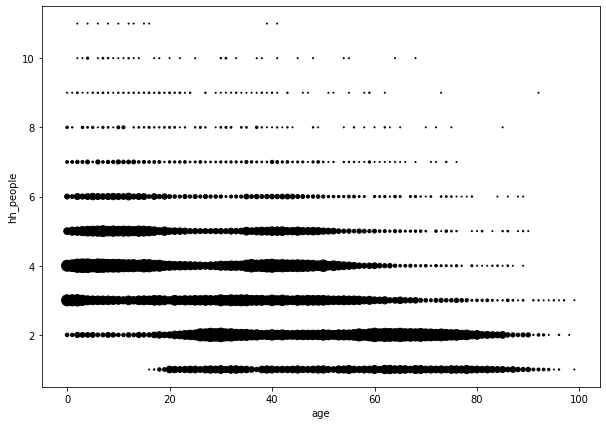

In [6]:
datgan.advise(df, graph, plot_graphs=True)

In [7]:
name = 'DATGAN_select'

In [8]:
output_folder = './output/{}/'.format(name)

In [9]:
datgan = DATGAN(output=output_folder,
                loss_function='WGAN',
                batch_size=1715,
                num_epochs=1000)

In [10]:
datgan.fit(df, data_info, graph, preprocessed_data_path='./output/encoded_select')

Preprocessed data have been loaded!
Start training DATGAN with the WGAN loss (04/07/2022 16:07:50).


Training DATGAN: 100%|██████████| 1000/1000 [26:02<00:00,  1.56s/it]

DATGAN has finished training (04/07/2022 16:33:52) - Training time: 26 minutes and 02 seconds


# Sampling

In [11]:
samp = datgan.sample(len(df))
samp.to_csv('../../data/synthetic/DATGAN_select.csv', index=False)

Sampling from DATGAN: 100%|██████████| 29158/29158 [00:00<00:00, 35817.14it/s]


In [12]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [13]:
nbrs = {}
dct = {}

for r in boroughs:
    tmp = pd.read_csv('../../data/nomis/{}.csv'.format(r))

    nbrs[r] = len(tmp)
    dct[r] = []

In [14]:
remaining_boroughs = set(boroughs)

count = 1
while remaining_boroughs:

    print("Pass {} - Remaining boroughs: {}".format(count, len(remaining_boroughs)))

    samp = datgan.sample(100000)

    region_to_remove = []

    for r in remaining_boroughs:
        tmp = samp[samp.hh_borough == r]

        if len(tmp) > nbrs[r]:
            tmp = tmp.sample(nbrs[r], replace=False)

        nbrs[r] -= len(tmp)
        dct[r].append(tmp)

        if nbrs[r] == 0:
            region_to_remove.append(r)


    for r in region_to_remove:
        remaining_boroughs.remove(r)

    count += 1

Pass 1 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38022.56it/s]


Pass 2 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38022.71it/s]


Pass 3 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38102.92it/s]


Pass 4 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38259.29it/s]


Pass 5 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38006.85it/s]


Pass 6 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37862.33it/s]


Pass 7 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38028.22it/s]


Pass 8 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38043.33it/s]


Pass 9 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38224.91it/s]


Pass 10 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37957.88it/s]


Pass 11 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38273.13it/s]


Pass 12 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38273.30it/s]


Pass 13 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37961.87it/s]


Pass 14 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38045.92it/s]


Pass 15 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38389.05it/s]


Pass 16 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37556.41it/s]


Pass 17 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38051.93it/s]


Pass 18 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38136.58it/s]


Pass 19 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38125.36it/s]


Pass 20 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37945.72it/s]


Pass 21 - Remaining boroughs: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38048.94it/s]


Pass 22 - Remaining boroughs: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38159.68it/s]


Pass 23 - Remaining boroughs: 8


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37954.25it/s]


Pass 24 - Remaining boroughs: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37779.84it/s]


Pass 25 - Remaining boroughs: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37568.48it/s]


Pass 26 - Remaining boroughs: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37928.67it/s]


Pass 27 - Remaining boroughs: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38088.01it/s]


Pass 28 - Remaining boroughs: 6


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37312.41it/s]


Pass 29 - Remaining boroughs: 6


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38006.62it/s]


Pass 30 - Remaining boroughs: 5


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37907.88it/s]


Pass 31 - Remaining boroughs: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37916.72it/s]


Pass 32 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38194.28it/s]


Pass 33 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38304.17it/s]


Pass 34 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38187.59it/s]


Pass 35 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38129.38it/s]


Pass 36 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37919.22it/s]


Pass 37 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 38146.51it/s]


Pass 38 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37593.31it/s]


Pass 39 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37889.11it/s]


Pass 40 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 35951.69it/s]


Pass 41 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 36927.90it/s]


Pass 42 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37509.78it/s]


Pass 43 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37563.43it/s]


Pass 44 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37419.12it/s]


Pass 45 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37550.64it/s]


Pass 46 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37480.13it/s]


Pass 47 - Remaining boroughs: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 37403.51it/s]


In [15]:
for r in dct.keys():
    tmp = pd.concat(dct[r])
    tmp.to_csv('../../data/DATGAN_select/{}.csv'.format(r), index=False)